In [50]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



#read in the data
df = pd.read_csv(r'C:\ilia\DataAnalystWorkspace\Movies\movies\movies.csv')

Let's see if there is any missing data

In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [53]:
# Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
             ...   
country      object
budget      float64
gross       float64
company      object
runtime     float64
Length: 15, dtype: object

In [54]:
# change data types for columns

df = df.fillna(0)
df.budget.astype(int)
df.gross.astype(int)

0        46998772
1        58853106
2       538375067
3        83453539
4        39846344
          ...    
7663            0
7664            0
7665            0
7666            0
7667            0
Name: gross, Length: 7668, dtype: int32

In [55]:
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
             ...   
country      object
budget        int64
gross         int64
company      object
runtime     float64
Length: 15, dtype: object

In [56]:
df['company'].replace(0, np.nan, inplace=True)


In [32]:
pd.set_option("display.max_rows", 10)

In [57]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [58]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=True)

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
3748                     1+2 Seisaku Iinkai
5813                        10 West Studios
                       ...                 
4007                               i5 Films
6412               iDeal Partners Film Fund
5664                            micro_scope
7129                                thefyzz
7657                                    NaN
Name: company, Length: 2386, dtype: object

In [18]:
# Budget high correlation
# Company high correlation

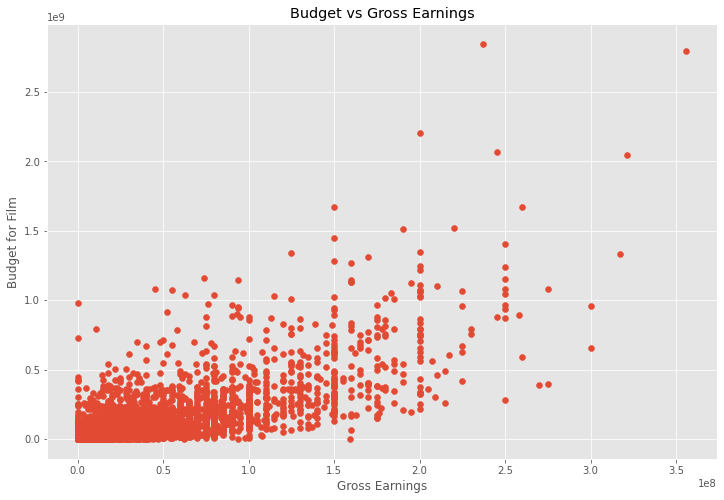

In [25]:
# Scatter plot  with budget vs gross

plt.scatter(x=df['director'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

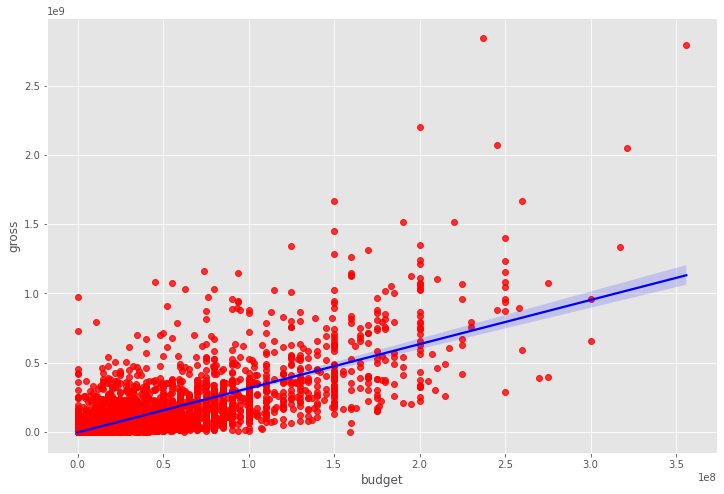

In [30]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [37]:
# lets start looking at correlation

df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [38]:
# High Correlation between budget and gross - True


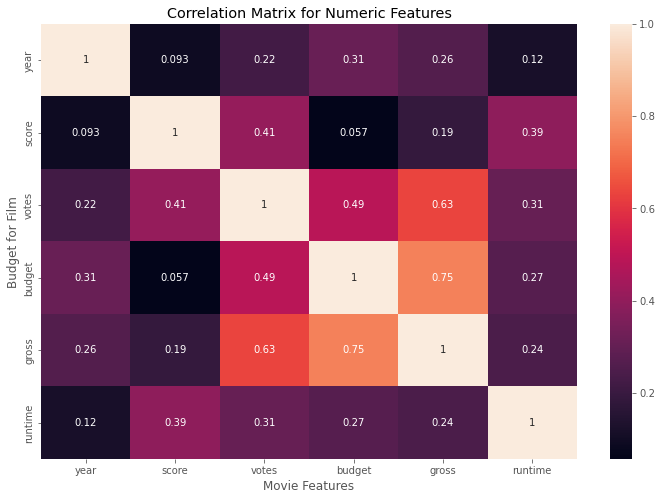

In [41]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Budget for Film')

plt.show()

In [1]:
# Looks at Company



In [48]:
# Change text values to numeric
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,6,0,2009,697,7.8,1100000,1155,1779,2335,56,237000000,2847246203,2253,162.0
7445,535,6,0,2019,184,8.4,903000,162,744,2242,56,356000000,2797501328,1606,181.0
3045,6896,6,6,1997,705,7.8,1100000,1155,1779,1596,56,200000000,2201647264,2253,194.0
6663,5144,6,0,2015,699,7.8,876000,1125,2551,525,56,245000000,2069521700,1540,138.0
7244,536,6,0,2018,193,8.4,897000,162,744,2242,56,321000000,2048359754,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,7,5,1989,1278,4.5,274,117,83,2798,56,0,0,1159,92.0
1614,1745,7,10,1989,56,5.2,1300,1033,1744,167,55,0,0,146,85.0
1606,2691,7,8,1989,258,6.0,2900,2743,947,1196,7,0,0,2237,89.0
1601,3836,0,4,1989,1161,7.1,1500,1105,1697,682,19,0,0,504,104.0


In [64]:
df_numerized.company.value_counts()


2281    377
2319    334
731     332
1812    320
2253    240
       ... 
1596      1
1273      1
2071      1
1578      1
1787      1
Name: company, Length: 2386, dtype: int64

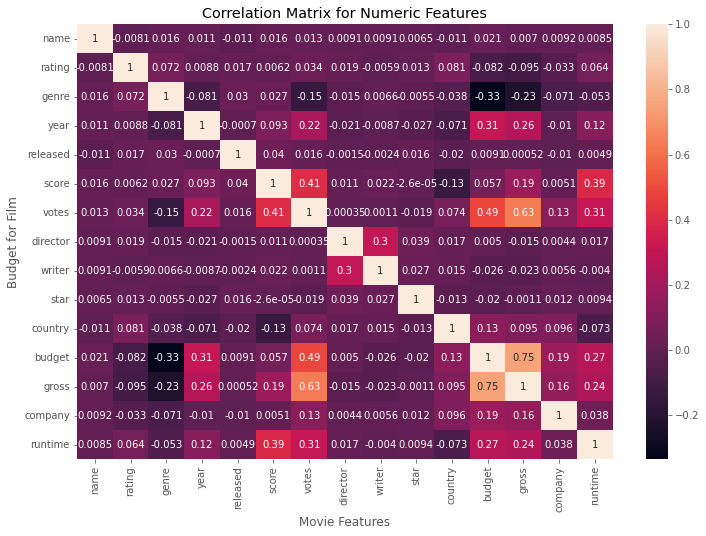

In [60]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Text Features')

plt.xlabel('Movie Features')

plt.ylabel('Budget for Film')

plt.show()

In [65]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country,-0.010737,0.081244,-0.037615,-0.070938,-0.020427,-0.133346,0.073525,0.017490,0.015343,-0.012998,1.000000,0.131720,0.095325,0.095548,-0.073319
budget,0.020548,-0.081939,-0.334021,0.309212,0.009145,0.056863,0.486931,0.004976,-0.025911,-0.019952,0.131720,1.000000,0.750157,0.186474,0.268372
gross,0.006989,-0.095450,-0.234297,0.261900,0.000519,0.186012,0.632870,-0.014916,-0.022997,-0.001129,0.095325,0.750157,1.000000,0.156745,0.244339
company,0.009211,-0.032943,-0.071067,-0.010431,-0.010474,0.005081,0.133457,0.004404,0.005646,0.012442,0.095548,0.186474,0.156745,1.000000,0.037537


In [71]:
pd.set_option("display.max_rows", 10)

In [72]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.073319
         budget      0.268372
         gross       0.244339
         company     0.037537
         runtime     1.000000
Length: 225, dtype: float64

In [73]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre    budget    -0.334021
budget   genre     -0.334021
gross    genre     -0.234297
genre    gross     -0.234297
votes    genre     -0.145296
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [77]:
high_corr = sorted_pairs[ (sorted_pairs) > 0.5]

high_corr

votes    gross      0.632870
gross    votes      0.632870
         budget     0.750157
budget   gross      0.750157
name     name       1.000000
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 19, dtype: float64